In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import cv2
import glob
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input

In [2]:
model =  InceptionV3(weights='imagenet',include_top=False,input_shape=(139, 139, 3))

In [3]:
query = cv2.imread('query_1.jpg')
query = np.array(query,np.float64)
query = cv2.resize(query,(139,139))
query_np = np.expand_dims(query,axis=0)
query_np = preprocess_input(query_np)

In [4]:
images = []
for path in glob.glob('./images/*'):
    img = cv2.imread(path)
    img = np.array(img,np.float64)
    img = cv2.resize(img,(139,139))
    img = np.expand_dims(img,axis=0)
    img = preprocess_input(img)
    images.append(img)

In [5]:
images = np.array(images).squeeze()
predict_query = model.predict(query_np)
predict_images_retrival =  model.predict(images)

In [6]:
from sklearn.metrics.pairwise import cosine_similarity
pred_query  = np.reshape(predict_query,  (1, -1))
pred_images = np.reshape(predict_images_retrival, (predict_images_retrival.shape[0], -1))

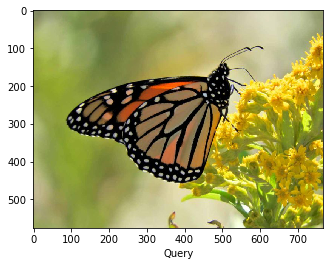

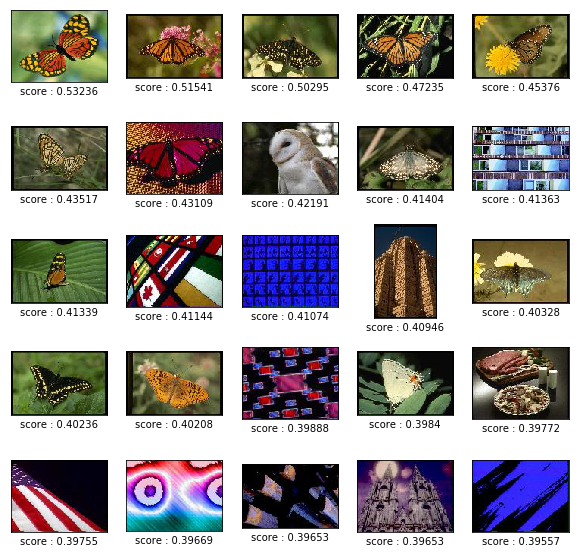

In [7]:
sim = cosine_similarity(pred_query, pred_images).squeeze()
image_response = [path for path in glob.glob('./images/*')]
def getKey(item):
    return item[0]

tp = zip(sim.tolist(),image_response)

tp_s = sorted(tp, key=getKey, reverse=True)
img = cv2.imread('query_1.jpg')
#img = cv2.resize(img,(30,30))
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.xlabel("Query")
plt.figure(figsize=(10,10))
for i in range(25):
    img = cv2.imread(tp_s[i][1])
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(img)
    score = round(tp_s[i][0],5)
    plt.xlabel("score : " + str(score))
plt.show()